In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('ggplot')

In [82]:
bpvnp_material_df = pd.read_csv('bpvnp_by_material.csv', delimiter='|')
bpvnp_material_df['win_rate'] = bpvnp_material_df['wins'] / bpvnp_material_df[['wins','draws','losses']].sum(axis=1)
bpvnp_material_df['draw_rate'] = bpvnp_material_df['draws'] / bpvnp_material_df[['wins','draws','losses']].sum(axis=1)
bpvnp_material_df['average_points'] = bpvnp_material_df['win_rate'] + 0.5 * bpvnp_material_df['draw_rate']
bpvnp_material_df

,material,wins,draws,losses,win_rate,draw_rate,average_points
0,33,7934,602,6474,0.528581,0.040107,0.548634
1,32,13328,991,10585,0.535175,0.039793,0.555071
2,31,4422,310,3421,0.542377,0.038023,0.561388
3,30,646,41,521,0.534768,0.033940,0.551738
4,29,60,5,61,0.476190,0.039683,0.496032
5,28,4817,658,4822,0.467806,0.063902,0.499757


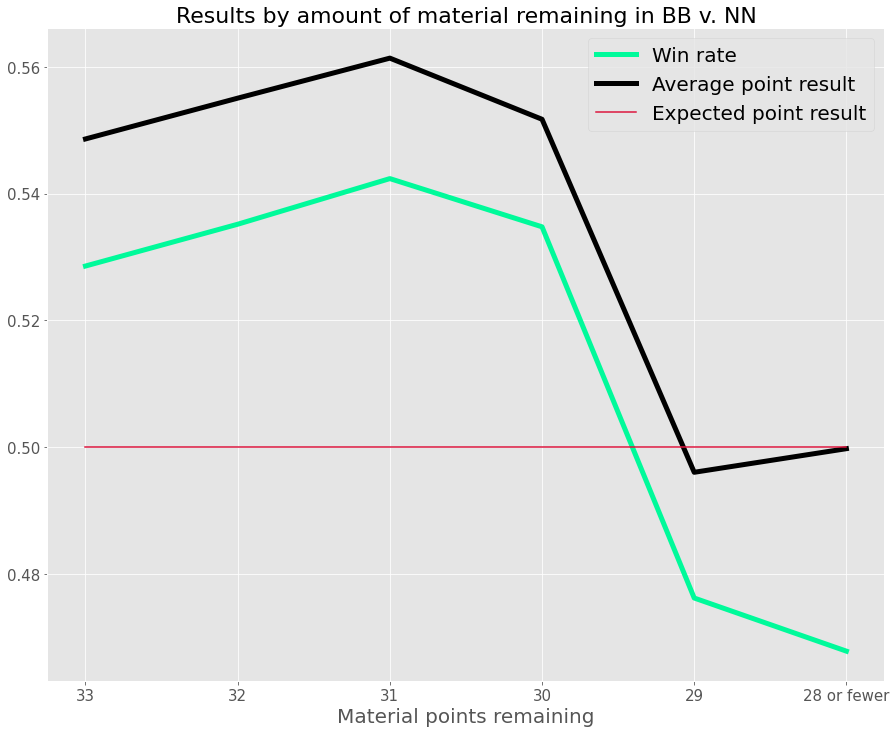

In [130]:
fig, ax = plt.subplots(figsize=(15,12))

ax.plot(bpvnp_material_df['material'], bpvnp_material_df['win_rate'],
        linewidth=5, color='mediumspringgreen')
ax.plot(bpvnp_material_df['material'], bpvnp_material_df['average_points'],
        linewidth=5, color='black')
# ax.plot(bpvnp_material_df['material'], bpvnp_material_df['draw_rate'],
#         linewidth=5, color='blue')
ax.plot([28, 33], [0.5, 0.5], color='crimson')

ax.set_title('Results by amount of material remaining in BB v. NN', fontsize=22)

ax.legend(['Win rate','Average point result','Expected point result'],
            prop={'size': 20})

ax.set_xlabel('Material points remaining', fontsize=20)

ax.set_xticks(np.arange(28, 34))
ax.set_xticklabels(['28 or fewer','29','30','31','32','33'],
                    fontdict={'fontsize': 15});

plt.yticks(size=15)

ax.invert_xaxis()
                    
plt.savefig('../images/bbnn_by_material.png');

In [58]:
nbvrp_df = pd.read_csv('nbvrp_by_queens.csv', delimiter="|")
nbvrp_df['win_rate'] = nbvrp_df['wins'] / nbvrp_df[['wins','draws','losses']].sum(axis=1)
nbvrp_df['draw_rate'] = nbvrp_df['draws'] / nbvrp_df[['wins','draws','losses']].sum(axis=1)
nbvrp_df['loss_rate'] = nbvrp_df['losses'] / nbvrp_df[['wins','draws','losses']].sum(axis=1)
nbvrp_df

,queen_present,wins,draws,losses,win_rate,draw_rate,loss_rate
0,'both',13141,1346,10466,0.526630,0.053941,0.419429
1,'yes',8532,604,6187,0.556810,0.039418,0.403772
2,'no',4609,742,4279,0.478609,0.077051,0.444341


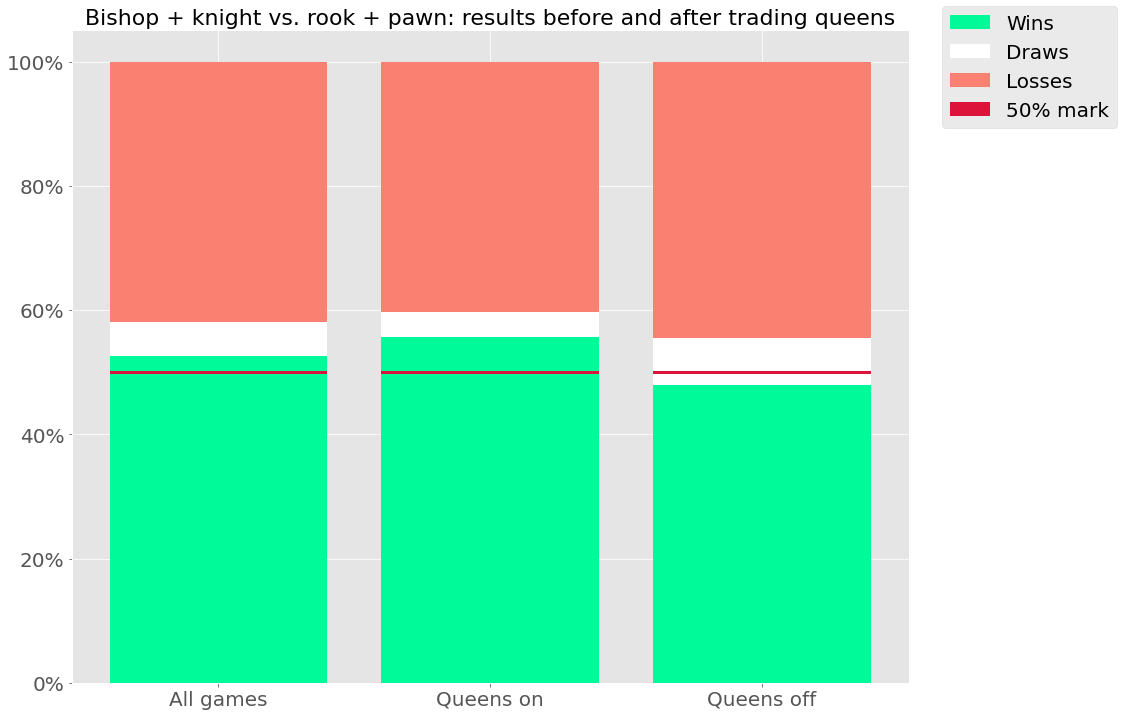

In [133]:
fig, ax = plt.subplots(figsize=(15, 12))

x = ['All games', 'Queens on', 'Queens off']
y1 = nbvrp_df['win_rate']
y2 = nbvrp_df['draw_rate']
y3 = nbvrp_df['loss_rate']
y4 = 0.005

ax.bar(x, y1, color='mediumspringgreen')
ax.bar(x, y2, bottom=y1, color='white')
ax.bar(x, y3, bottom=y1+y2, color='salmon')
ax.bar(x, y4, bottom=0.4975, color='crimson')

ax.set_title('Bishop + knight vs. rook + pawn: results before and after trading queens', fontsize=22)

ax.legend(['Wins','Draws','Losses','50% mark'],
            prop={'size': 20}, loc=(1.04, 0.85))

plt.xticks(size=20)
plt.yticks(size=20)
ax.set_yticks(np.arange(0, 1.2, 0.2))
ax.set_yticklabels(['0%','20%','40%','60%','80%','100%'])
                    
plt.savefig('../images/nbvrp_by_queens.png');

In [112]:
qv2r_df = pd.read_csv('qv2r_by_pawns.csv', delimiter="|")
qv2r_df['win_rate'] = qv2r_df['wins'] / qv2r_df[['wins','draws','losses']].sum(axis=1)
qv2r_df['draw_rate'] = qv2r_df['draws'] / qv2r_df[['wins','draws','losses']].sum(axis=1)
qv2r_df['loss_rate'] = qv2r_df['losses'] / qv2r_df[['wins','draws','losses']].sum(axis=1)
qv2r_df['average_points'] = qv2r_df['win_rate'] + 0.5 * qv2r_df['draw_rate']
qv2r_df

,num_pawns,wins,draws,losses,win_rate,draw_rate,loss_rate,average_points
0,'7+',127,24,124,0.461818,0.087273,0.450909,0.505455
1,'6',396,50,344,0.501266,0.063291,0.435443,0.532911
2,'5',533,86,538,0.460674,0.074330,0.464996,0.497839
3,'4',464,114,453,0.450048,0.110572,0.439379,0.505335
4,'3',283,106,358,0.378849,0.141901,0.479250,0.449799
5,'2',125,53,150,0.381098,0.161585,0.457317,0.461890
6,'1-',27,24,62,0.238938,0.212389,0.548673,0.345133


/home/colin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


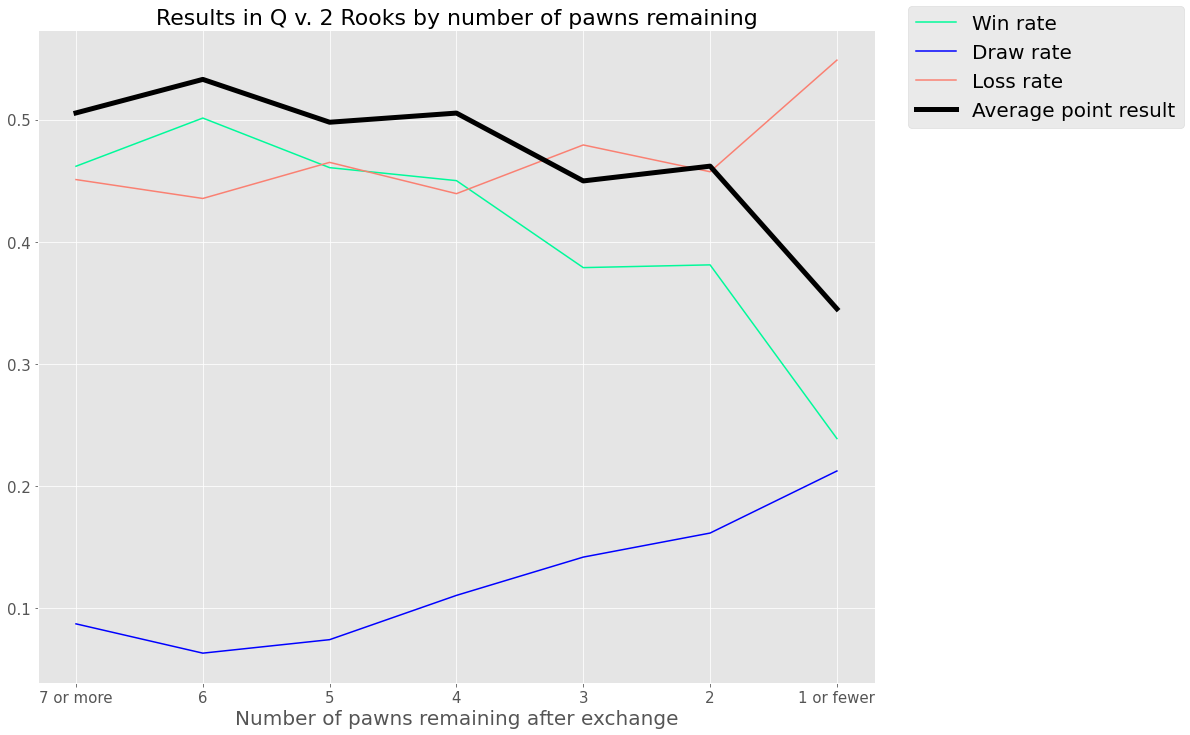

In [134]:
x = qv2r_df['num_pawns']

fig, ax = plt.subplots(figsize=(15, 12))
ax.plot(qv2r_df['win_rate'], label='Win rate', color='mediumspringgreen')
ax.plot(qv2r_df['draw_rate'], label='Draw rate', color='blue')
ax.plot(qv2r_df['loss_rate'], label='Loss rate', color='salmon')
ax.plot(qv2r_df['average_points'], label='Average point result',
        linewidth=5, color='black')

ax.set_title('Results in Q v. 2 Rooks by number of pawns remaining', fontsize=22)
ax.set_xlabel('Number of pawns remaining after exchange', fontsize=20)
ax.set_xticklabels(['','7 or more', '6','5','4','3','2','1 or fewer'], fontsize=15)
plt.yticks(size=15)

ax.legend(prop={'size': 20}, loc=(1.04, 0.85))

plt.savefig('../images/qv2r_by_pawns.png');